In [219]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import lazypredict
from datetime import datetime
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
import plotly.express as px

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

In [221]:
df = pd.read_csv('breast_cancer_survival.csv')
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95,2.15,0.01,-0.05,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00,1.38,-0.50,-0.51,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52,1.76,-0.37,0.01,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.88,0.13,-0.37,0.13,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.23,1.75,-0.54,-0.39,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [222]:
print(df.columns)
print(df.shape)

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')
(334, 15)


In [223]:
df_null=df.isna().sum()
df_null

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [224]:
df_null = df[df['Date_of_Last_Visit'].isna() & df['Patient_Status'].isna()]
print(df_null.index.tolist())
print(df_null.shape)

[9, 18, 60, 188, 200, 202, 214, 229, 230, 231, 268, 272, 321]
(13, 15)


So All the dates which don't have 'Date_of_Last_Visit' also don't have the record that if they survived or not . So that means we can drop those Columns and the coloumns where last date is not mentioned we are going to replace that with the Date_of_Surgery it won't be good for our 

In [225]:
list = [9, 18, 60, 188, 200, 202, 214, 229, 230, 231, 268, 272, 321]
df_unkown = df.iloc[list]

In [226]:
df = df.drop(df.index[list])

In [227]:
df_null = df[df['Date_of_Last_Visit'].isna()]

print(df_null.index.tolist())
df_null

[105, 117, 206, 316]


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
105,69,FEMALE,-0.76,-0.34,0.56,0.21,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,07-Oct-18,NaN,Dead
117,88,FEMALE,-0.60,1.38,0.40,0.27,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,04-Jun-19,NaN,Dead
206,47,FEMALE,0.52,2.65,-0.10,-0.05,III,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,29-Jul-18,NaN,Dead
316,79,FEMALE,0.98,1.71,-0.66,0.27,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,05-Apr-19,NaN,Dead


So here we'll assume that the person last date was on that day because all 4 women died in the case where last_dates are not given 

In [228]:
df['Date_of_Last_Visit']=df['Date_of_Last_Visit'].fillna(method="bfill",axis=0)

In [229]:
df['Histology'].value_counts()

Histology
Infiltrating Ductal Carcinoma     226
Infiltrating Lobular Carcinoma     83
Mucinous Carcinoma                 12
Name: count, dtype: int64

In [230]:
df['Surgery_type'].value_counts()

Surgery_type
Other                          98
Modified Radical Mastectomy    92
Lumpectomy                     66
Simple Mastectomy              65
Name: count, dtype: int64

### Data Visualization

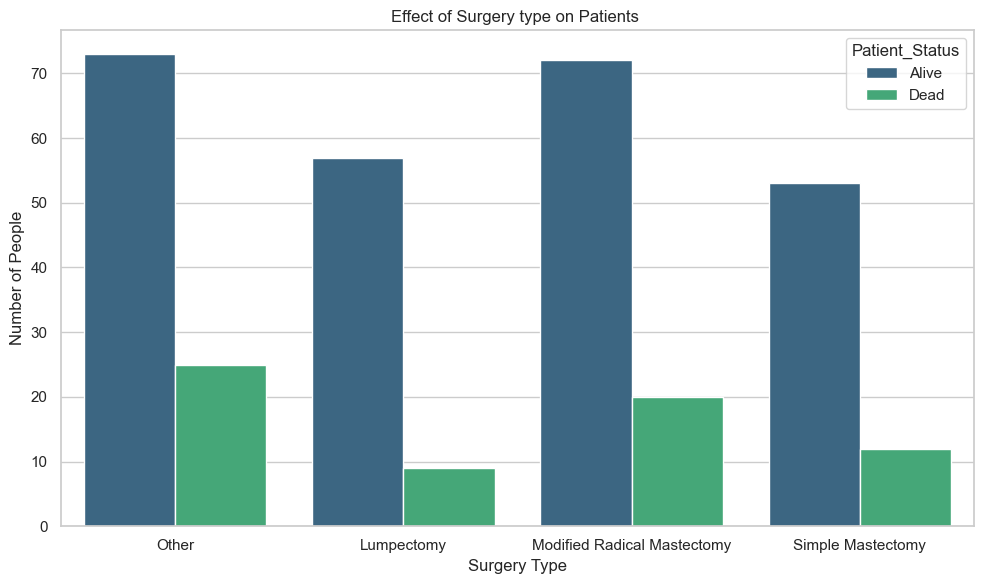

In [231]:
sn.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sn.countplot(x='Surgery_type', hue='Patient_Status', data=df,palette="viridis") 

plt.title('Effect of Surgery type on Patients ')
plt.xlabel('Surgery Type')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

For , Surgery type we will use nominal Encoding beacuse for other and radical Masectomy the difference is not much(<5)much and the same is the reason for other two surgeries

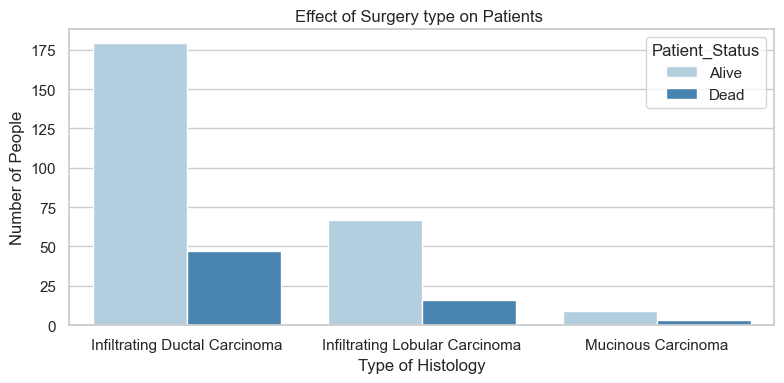

In [232]:
sn.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sn.countplot(x='Histology', hue='Patient_Status', data=df,palette="Blues") 

plt.title('Effect of Surgery type on Patients ')
plt.xlabel('Type of Histology')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

Here the apporimiate ratio of first 2 is 0.23 . WE will use nominal Encoding

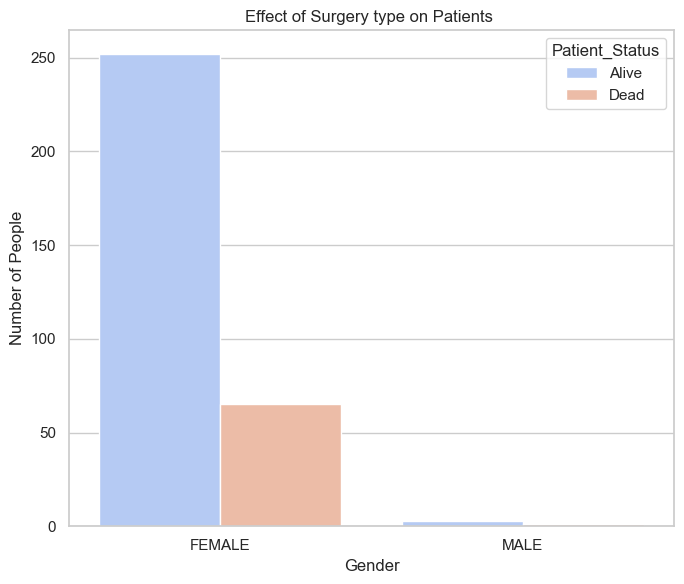

In [233]:
sn.set(style="whitegrid")

plt.figure(figsize=(7, 6))
sn.countplot(x='Gender', hue='Patient_Status', data=df,palette="coolwarm") 

plt.title('Effect of Surgery type on Patients ')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

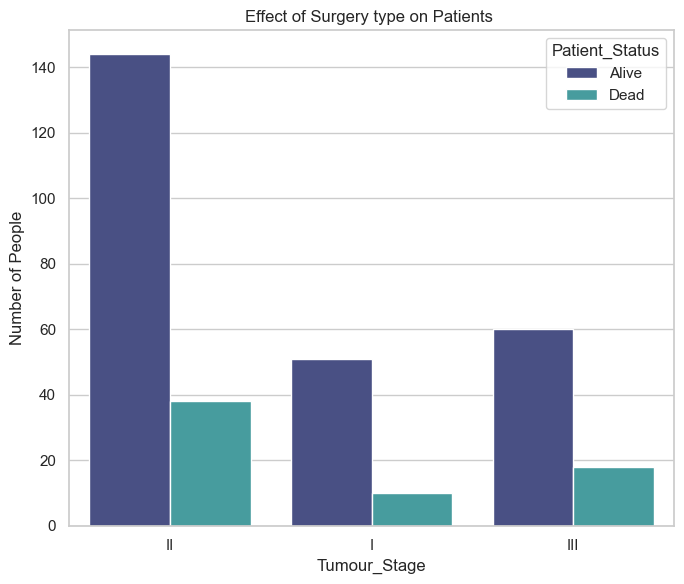

In [234]:
sn.set(style="whitegrid")

plt.figure(figsize=(7, 6))
sn.countplot(x='Tumour_Stage', hue='Patient_Status', data=df,palette="mako") 

plt.title('Effect of Surgery type on Patients ')
plt.xlabel('Tumour_Stage')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

Now, the interesting thing to note here is the ratio = dead/total for Stage_2 is 0.22, Stage_1 is 0.16 and Stage_3 is 0.23
There is a very minor differences between them which can also be due to other factors we will do Nominal Encoding 

Text(0.5, 0, 'HER2 status')

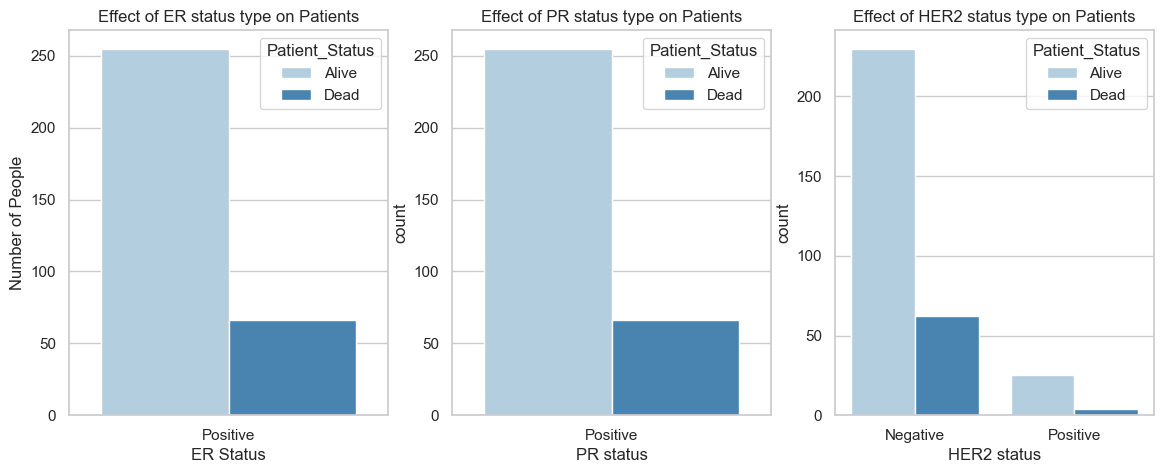

In [235]:


sn.set(style="whitegrid")

# Create a figure and two subplots side by side
fig, (ax1, ax2 , ax3) = plt.subplots(1, 3 , figsize=(14, 5))

# First subplot
sn.countplot(x='ER status', hue='Patient_Status', data=df, palette="Blues", ax=ax1)
ax1.set_title('Effect of ER status type on Patients')
ax1.set_xlabel('ER Status')
ax1.set_ylabel('Number of People')


# Second subplot
sn.countplot(x= 'PR status', hue='Patient_Status', data=df, palette="Blues", ax=ax2)
ax2.set_title('Effect of PR status type on Patients')
ax2.set_xlabel('PR status')


sn.countplot(x= 'HER2 status', hue='Patient_Status', data=df, palette="Blues", ax=ax3)
ax3.set_title('Effect of HER2 status type on Patients')
ax3.set_xlabel('HER2 status')


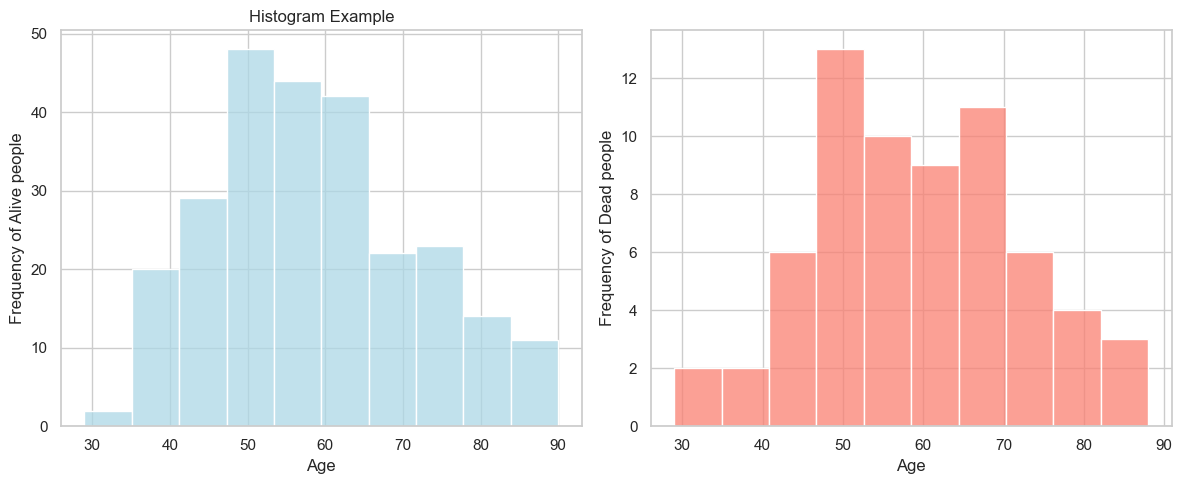

In [236]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
data1 = df[df['Patient_Status']=='Alive']['Age']
data2 = df[df['Patient_Status']=='Dead']['Age']
sn.histplot(data=data1, bins=10, kde=False, ax=ax1,color="lightblue")
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency of Alive people')
ax1.set_title('Histogram Example')
sn.histplot(data=data2, bins=10, kde=False,color="salmon",ax=ax2)
ax2.set_ylabel('Frequency of Dead people')
plt.tight_layout()

So, we can drop the 'ER Status' and 'PR Status' coloumn because they only have one value and apply Nominal Encoding for HER2 Status

### Feature Engineering 

In [237]:
df2 = df

First we will drop the 

In [238]:
df2['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'], format='%d-%b-%y')
df2['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'], format='%d-%b-%y')
df2['Days'] = (df2['Date_of_Last_Visit']-df2['Date_of_Surgery']).dt.days

df2.head()


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Days
0,42,FEMALE,0.95,2.15,0.01,-0.05,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-05-20,2018-08-26,Alive,98
1,54,FEMALE,0.00,1.38,-0.50,-0.51,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-04-26,2019-01-25,Dead,274
2,63,FEMALE,-0.52,1.76,-0.37,0.01,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,2018-08-24,2020-04-08,Alive,593
3,78,FEMALE,-0.88,0.13,-0.37,0.13,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-16,2020-07-28,Alive,620
4,42,FEMALE,0.23,1.75,-0.54,-0.39,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,2018-12-12,2019-01-05,Alive,24


Text(0, 0.5, 'Max HR')

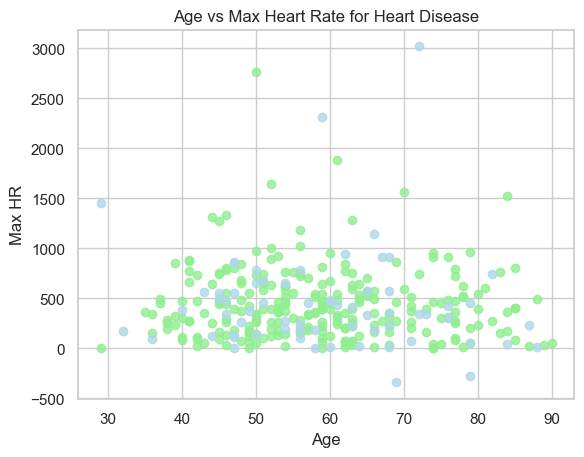

In [239]:
#Scatter with positive examples
plt.scatter(df2.Age[df.Patient_Status=="Alive"],
           df2.Days[df.Patient_Status=="Alive"],
           c="lightgreen",alpha=0.8)

#Scatter with negative examples
plt.scatter(df2.Age[df.Patient_Status=="Dead"],
           df2.Days[df.Patient_Status=="Dead"],
           c="lightblue",alpha=0.8)

plt.title("Age vs Max Heart Rate for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max HR")

In [240]:
alive_df = df2[df2['Patient_Status'] == 'Alive']
dead_df = df2[df2['Patient_Status'] == 'Dead']

# Create scatter plots using Plotly Express
fig = px.scatter()

# Add scatter traces for alive and dead patients
fig.add_scatter(
    x=alive_df['Age'],
    y=alive_df['Days'],
    mode='markers',
    marker=dict(color='lightblue'),
    name='Alive'
)

fig.add_scatter(
    x=dead_df['Age'],
    y=dead_df['Days'],
    mode='markers',
    marker=dict(color='salmon'),
    name='Dead'
)

# Set title and labels
fig.update_layout(
    title="Age vs Max Heart Rate for Heart Disease",
    xaxis_title="Age",
    yaxis_title="Max HR"
)

# Show the plot
fig.show()

Lets check for incorrect data , if date of surgery is more than date of last visit

In [241]:
df_incorrect = df2[df2['Date_of_Surgery'] > df2['Date_of_Last_Visit']]
df_incorrect

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Days
105,69,FEMALE,-0.76,-0.34,0.56,0.21,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2018-10-07,2017-11-01,Dead,-340
316,79,FEMALE,0.98,1.71,-0.66,0.27,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2019-04-05,2018-07-04,Dead,-275


In [242]:
df2 = df2.drop([105,316],axis=0)

In [243]:
columns_ = ['Histology', 'Tumour_Stage', 'Surgery_type','HER2 status','Gender','Patient_Status']
df2 = pd.get_dummies(df, columns=columns_, drop_first=False)

In [244]:
df2.columns

Index(['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'ER status',
       'PR status', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Days',
       'Histology_Infiltrating Ductal Carcinoma',
       'Histology_Infiltrating Lobular Carcinoma',
       'Histology_Mucinous Carcinoma', 'Tumour_Stage_I', 'Tumour_Stage_II',
       'Tumour_Stage_III', 'Surgery_type_Lumpectomy',
       'Surgery_type_Modified Radical Mastectomy', 'Surgery_type_Other',
       'Surgery_type_Simple Mastectomy', 'HER2 status_Negative',
       'HER2 status_Positive', 'Gender_FEMALE', 'Gender_MALE',
       'Patient_Status_Alive', 'Patient_Status_Dead'],
      dtype='object')

In [245]:
df2 = df2.drop(['ER status','PR status','Gender_MALE','Patient_Status_Dead','HER2 status_Negative','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
df2.head()

,Age,Protein1,Protein2,Protein3,Protein4,Days,Histology_Infiltrating Ductal Carcinoma,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,Tumour_Stage_I,Tumour_Stage_II,Tumour_Stage_III,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,HER2 status_Positive,Gender_FEMALE,Patient_Status_Alive
0,42,0.95,2.15,0.01,-0.05,98,True,False,False,False,True,False,False,False,True,False,False,True,True
1,54,0.00,1.38,-0.50,-0.51,274,True,False,False,False,True,False,False,False,True,False,False,True,False
2,63,-0.52,1.76,-0.37,0.01,593,True,False,False,False,True,False,True,False,False,False,False,True,True
3,78,-0.88,0.13,-0.37,0.13,620,True,False,False,True,False,False,False,False,True,False,False,True,True
4,42,0.23,1.75,-0.54,-0.39,24,True,False,False,False,True,False,True,False,False,False,True,True,True


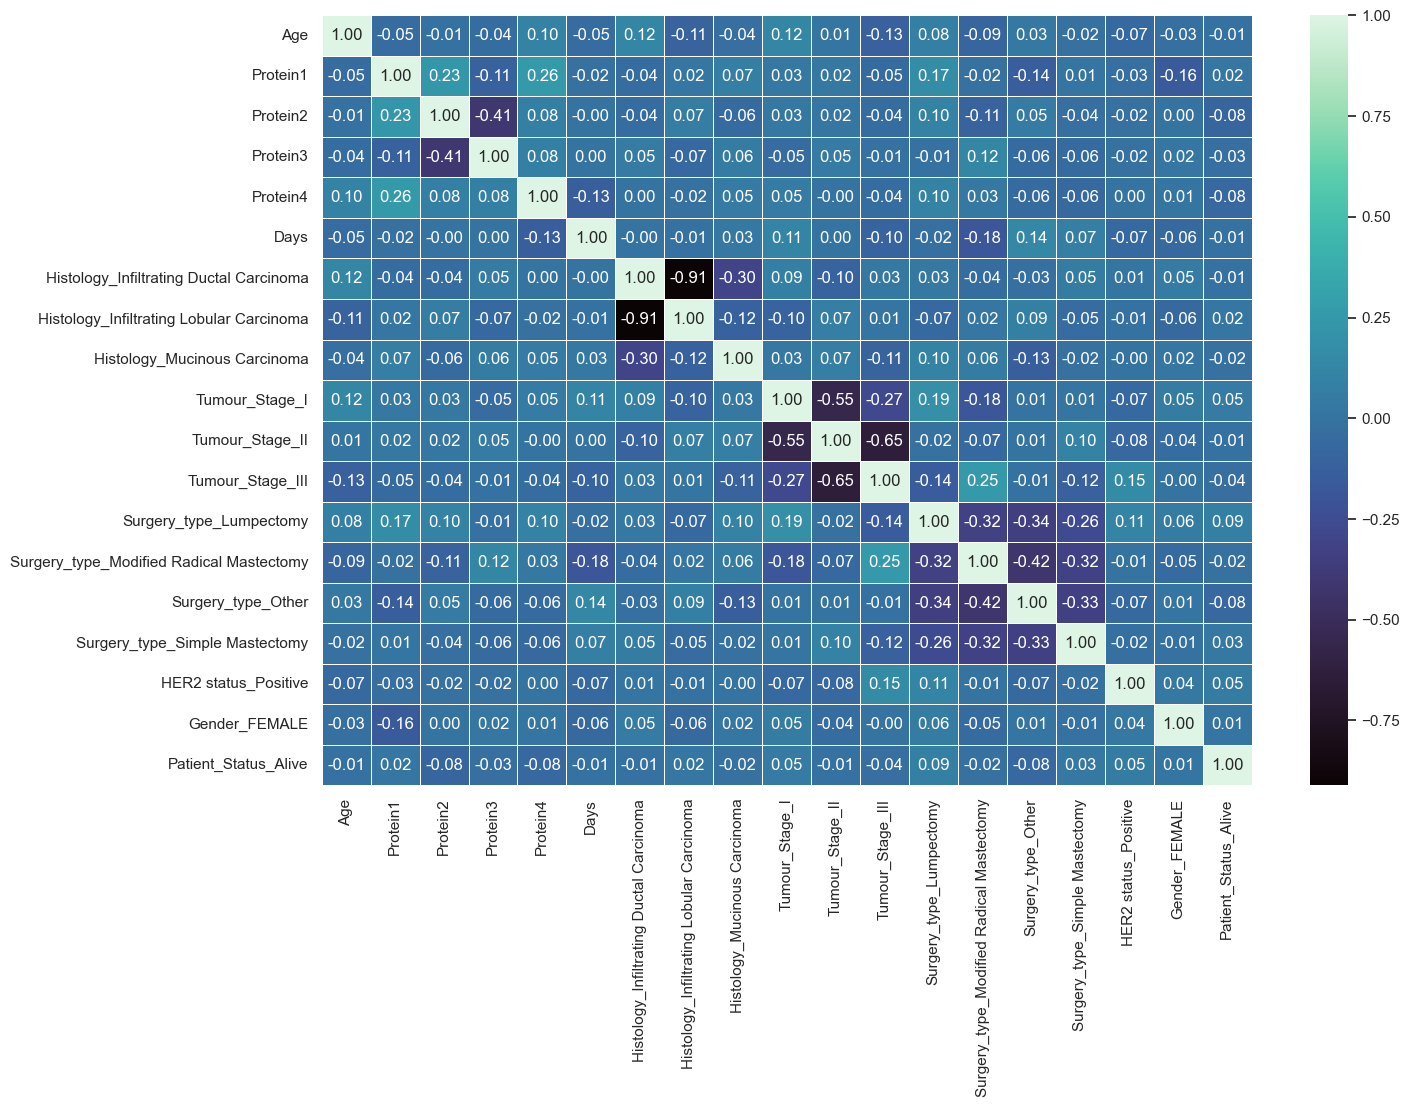

In [246]:
corr_matrix = df2.corr()
fig,ax = plt.subplots(figsize= (15,10))
ax= sn.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt= ".2f",
               cmap="mako")

In [247]:

X = df2.drop(['Patient_Status_Alive'],axis=1)
y = df2['Patient_Status_Alive']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [248]:
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

## Applying Machine Learning Models


### Logistic Regression

In [249]:
param_grid={
 'class_weight' : [None,'balanced'],
  'penalty': ['l1', 'l2', 'elasticnet', None],
  'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag'],
  'max_iter': [80,100,200]
}

In [250]:
model=LogisticRegression()
cv=GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
cv.fit(X_train_s,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_iter': [80, 100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag']},
             scoring='accuracy')

In [251]:
y_pred=cv.predict(X_test_s)
logistic_score=accuracy_score(y_pred,y_test)
logistic_score

0.7641509433962265

In [252]:
cv.best_params_
# Perform cross-validation and get scores
cv = cross_val_score(model, X, y, cv=5, scoring='accuracy')

In [253]:
cv.mean()

0.7912980769230769

In [254]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:00<00:00, 32.81it/s]

[LightGBM] [Info] Number of positive: 175, number of negative: 40
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 215, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.813953 -> initscore=1.475907
[LightGBM] [Info] Start training from score 1.475907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [255]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score   
Model                                                                           
DecisionTreeClassifier             0.67               0.55     0.55      0.67  \
SGDClassifier                      0.72               0.53     0.53      0.68   
ExtraTreeClassifier                0.66               0.52     0.52      0.65   
AdaBoostClassifier                 0.70               0.51     0.51      0.66   
GaussianNB                         0.75               0.51     0.51      0.67   
QuadraticDiscriminantAnalysis      0.75               0.51     0.51      0.67   
RandomForestClassifier             0.73               0.51     0.51      0.66   
LogisticRegression                 0.75               0.50     0.50      0.65   
SVC                                0.75               0.50     0.50      0.65   
RidgeClassifierCV                  0.75               0.50     0.50      0.65   
RidgeClassifier             